<a href="https://colab.research.google.com/github/MarwaRabia/Head_Pose_Estimator_Project_MLI/blob/master/ModleV2mediapipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unrar x "/content/drive/MyDrive/image.rar"

Streaming output truncated to the last 5000 lines.
Extracting  image/250351361_1.mat                                         34%  OK 
Extracting  image/2504948725_1.jpg                                        34%  OK 
Extracting  image/2504948725_1.mat                                        34%  OK 
Extracting  image/2504948725_2.jpg                                        34%  OK 
Extracting  image/2504948725_2.mat                                        34%  OK 
Extracting  image/2505523580_1.jpg                                        34%  OK 
Extracting  image/2505523580_1.mat                                        34%  OK 
Extracting  image/2506448164_1.jpg                                        34%  OK 
Extracting  image/2506448164_1.mat                                        34%  OK 
Extracting  image/2507367343_1.jpg                                        34%  OK 
Extracting  image/2507367343_

# New Section

In [ ]:
%%capture
!pip install mediapipe

##import Libraries

In [ ]:
import numpy as np
import scipy.io as sio
import dlib
import pandas as pd
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from imutils import face_utils
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import mediapipe
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import pickle


##get distinct path for each image as a list







In [ ]:
def get_list_from_filenames(file_path):
    # input:    relative path to .mat file with file names
    # output:   list of relative path names
    lines = [Path(f).stem for f in glob.glob(file_path)]
    return lines

##extract pose of face


In [ ]:

def read_pose(path):
    mat = sio.loadmat(path)
    # print(mat)
    pre_pose_params = mat['Pose_Para'][0]
    # Get [pitch, yaw, roll]
    pose_params = pre_pose_params[:3]
    return  pose_params


##get_landmarkes function return landmarkes for face as  x list  and y list using mediapipe

In [ ]:
def get_landmarkes(path):
  xx=[]
  yy=[]
  faceModule = mediapipe.solutions.face_mesh
  # loading image and its correspinding mat file
  with faceModule.FaceMesh(static_image_mode=True) as faces:
      # loading the image
      # processing the face to extract the landmark points (468 point) for each x,y,z
      image=cv2.imread(path)
      results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      # print(results.multi_face_landmarks.)
      if results.multi_face_landmarks != None: 
        # looping over the faces in the image
        for face in results.multi_face_landmarks:
            # print(len(face.landmark))
            xx=[landmark.x for landmark in face.landmark]
            yy=[landmark.y for landmark in face.landmark]
  return xx,yy

In [ ]:

class AFLW2000():
    def __init__(self, data_dir,file_path, img_ext='.jpg', annot_ext='.mat', image_mode='RGB'):
        self.data_dir = data_dir
        self.file_path = file_path
        self.img_ext = img_ext
        self.annot_ext = annot_ext
        filename_list = get_list_from_filenames(data_dir)
        filename_list.sort()
        self.X_train = filename_list
        self.y_train = filename_list
        self.image_mode = image_mode
        self.length = len(filename_list)

    def __getitem__(self, index):
      
        mat_path = os.path.join(self.file_path,self.y_train[index] + self.annot_ext)
        jpg_path=os.path.join(self.file_path,self.y_train[index] + self.img_ext)
        x2,y2=get_landmarkes(jpg_path)
        x2=np.array(x2)
        xn=x2-x2[2]

        # print(x2-x2[2])
        y2=np.array(y2)
        # print(x2.shape)
        # print(y2.shape)

        pose = read_pose(mat_path)
      
        # pt3d2= np.add(x2, y2) 
        pt3d2=np.concatenate((x2, y2), axis=None)

        pitch = pose[0]
        yaw = pose[1]
        roll = pose[2]
        return pt3d2,pitch, yaw, roll 

    def __len__(self):
        # 2,000
        return self.length

In [ ]:
demo=AFLW2000("/content/image/*.mat",'/content/image/')

##create dataframe from  features  and labels 

In [46]:
# l=demo.__len__()
l=2710
landmarks_x = ['x' + str(i) for i in range(468)]
landmarks_y = ['y' + str(i) for i in range(468)]
features = landmarks_x + landmarks_y
labels = ['pitch', 'yaw', 'roll']
df = pd.DataFrame(columns = features + labels)
for i in range(l):
    pla=demo.__getitem__(i)
    landmarks=pla[0]
    p=pla[1]
    ya=pla[2]
    r=pla[3]
    featuress=landmarks.reshape(1, -1)
    row = np.append(featuress, [p, ya, r]).reshape(1, -1)
    df2 =pd.DataFrame(row, columns = features + labels)
    # print(i)
    df2.reset_index(drop=True, inplace=True)
    # print(df2.shape)
    df = df.append(df2)
     

In [47]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y461,y462,y463,y464,y465,y466,y467,pitch,yaw,roll
0,0.467596,0.466501,0.470845,0.461489,0.467716,0.471568,0.482683,0.370984,0.488630,0.490713,...,0.637031,0.643605,0.556000,0.558392,0.558702,0.552916,0.545472,0.224714,0.078211,0.080779
0,0.489280,0.491343,0.490961,0.480760,0.492012,0.493049,0.495914,0.385665,0.497735,0.498651,...,0.646580,0.651536,0.555619,0.558411,0.559703,0.555073,0.547906,0.129066,-0.008744,0.011832
0,0.564632,0.579258,0.567733,0.560310,0.581008,0.578635,0.568917,0.437365,0.566413,0.567387,...,0.628570,0.634182,0.549002,0.550933,0.551120,0.555326,0.548461,0.252579,-0.307590,-0.001831
0,0.486319,0.493132,0.490959,0.488949,0.495717,0.499287,0.508200,0.393381,0.515138,0.518795,...,0.673176,0.676243,0.588883,0.589809,0.590346,0.591982,0.587706,0.034011,-0.031420,0.148353
0,0.444646,0.454344,0.454583,0.461102,0.458609,0.466193,0.486772,0.395753,0.501272,0.507448,...,0.666649,0.670673,0.579247,0.580532,0.581221,0.589769,0.584860,0.080630,0.143988,0.273986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.593158,0.615834,0.596699,0.594853,0.619024,0.615765,0.600707,0.453034,0.598040,0.600673,...,0.672143,0.674536,0.539183,0.545717,0.551079,0.527258,0.519143,-0.131564,-0.415611,0.099537
0,0.636593,0.625896,0.614105,0.579867,0.619803,0.603870,0.558091,0.451032,0.534752,0.527209,...,0.609299,0.616293,0.548263,0.551752,0.552113,0.527516,0.520949,0.449112,-0.656295,-0.647476
0,0.486975,0.470638,0.479174,0.454115,0.468017,0.466698,0.466431,0.362424,0.463841,0.461309,...,0.694411,0.693903,0.556647,0.563897,0.570818,0.534234,0.526042,-0.387279,0.106053,-0.103408
0,0.534430,0.579265,0.550698,0.579600,0.588212,0.592014,0.595635,0.478682,0.607792,0.618043,...,0.741630,0.739831,0.625355,0.631346,0.638382,0.631975,0.628001,-0.569309,-0.436734,0.550604


##split data and train model

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df[features], df[labels], test_size=0.2, random_state=42)
# split y_train into pitch, yaw, roll
y_train_pitch = y_train['pitch']
y_train_yaw = y_train['yaw']
y_train_roll = y_train['roll']
# split y_test into pitch, yaw, roll
y_test_pitch = y_test['pitch']
y_test_yaw = y_test['yaw']
y_test_roll = y_test['roll']

pitch_model = Ridge(alpha = 0.001).fit(X_train, y_train_pitch)
# model1= Lasso(alpha = 0.001).fit(X_train, y_train_pitch)
yaw_model= Lasso(alpha = 0.001).fit(X_train, y_train_yaw)
roll_model= Lasso(alpha = 0.001).fit(X_train, y_train_roll)
# model1=LinearRegression().fit(X_train, y_train_pitch)
# model1=SVR(kernel='linear', C=1).fit(X_train, y_train_pitch)
# model1=RandomForestRegressor(random_state=0, n_estimators=5, max_depth=10).fit(X_train, y_train_pitch)
# model1=DecisionTreeRegressor(max_depth=5).fit(X_train, y_train_pitch)


##save Models

In [ ]:
pickle.dump(pitch_model, open('/content/drive/MyDrive/MLProject/Models/pitch_model.pkl', 'wb'))
pickle.dump(yaw_model, open('/content/drive/MyDrive/MLProject/Models/yaw_model.pkl', 'wb'))
pickle.dump(roll_model, open('/content/drive/MyDrive/MLProject/Models/roll_model.pkl', 'wb'))

##using model to predict labels

In [ ]:
y_pred_pitch = pitch_model.predict(X_test)
y_pred_yaw = yaw_model.predict(X_test)
y_pred_roll = roll_model.predict(X_test)

##Test accurcy for model

In [ ]:

print('Pitch:')
print('Mean Squared Error for train :', mean_squared_error(y_train_pitch, pitch_model.predict(X_train)))
print('Mean Squared Error for test train :', mean_squared_error(y_test_pitch, y_pred_pitch))
print('R2 Score for train:', r2_score(y_train_pitch, pitch_model.predict(X_train)))
print('R2 Score for test:', r2_score(y_test_pitch, y_pred_pitch))


print("\n Yaw:")
print('Mean Squared Error for train:', mean_squared_error(y_train_yaw, yaw_model.predict(X_train)))
print('Mean Squared Error for test:', mean_squared_error(y_test_yaw, y_pred_yaw))
print('R2 Score for train:', r2_score(y_train_yaw, yaw_model.predict(X_train)))
print('R2 Score for test:', r2_score(y_test_yaw, y_pred_yaw))


print("\n Roll:")
print('Mean Squared Error for train:', mean_squared_error(y_train_roll, roll_model.predict(X_train)))
print('Mean Squared Error for test:', mean_squared_error(y_test_roll, y_pred_roll))
print('R2 Score for train:', r2_score(y_train_roll, roll_model.predict(X_train)))
print('R2 Score for test:', r2_score(y_test_roll, y_pred_roll))



Pitch:
Mean Squared Error for train : 0.0038186622033000092
Mean Squared Error for test train : 0.004393399777606082
R2 Score for train: 0.8663417794552675
R2 Score for test: 0.8578405243281142

 Yaw:
Mean Squared Error for train: 0.0034403821784452244
Mean Squared Error for test: 0.0033589702140435353
R2 Score for train: 0.954316012044119
R2 Score for test: 0.9589418722195326

 Roll:
Mean Squared Error for train: 0.0023634207489786553
Mean Squared Error for test: 0.002549893879243335
R2 Score for train: 0.8901440839011934
R2 Score for test: 0.8953021501746463


In [ ]:

dfh = pd.DataFrame({'Actual_P': y_test_pitch,'Predicted_P': y_pred_pitch
                    ,'Actual_Y': y_test_yaw, 'Predicted_Y':y_pred_yaw,
                    'Actual_R': y_test_roll, 'Predicted_R': y_pred_roll})
dfh

,Actual_P,Predicted_P,Actual_Y,Predicted_Y,Actual_R,Predicted_R
0,0.222968,0.145846,0.394897,0.322790,-0.268146,-0.194462
0,-0.294666,-0.201919,0.377414,0.345672,-0.318104,-0.197551
0,-0.145192,-0.149775,0.160187,0.103245,0.214641,0.125242
0,-0.164833,-0.201362,0.137113,0.146518,-0.068030,-0.046438
0,-0.171770,-0.217990,0.550455,0.484252,-0.158736,-0.119360
...,...,...,...,...,...,...
0,-0.365392,-0.331531,-0.046710,-0.065712,-0.045747,-0.065746
0,-0.127221,-0.149654,0.170060,0.171961,-0.047013,-0.034345
0,-0.205512,-0.159304,-0.587907,-0.521974,0.087634,0.049151
0,-0.041407,-0.134003,-0.598238,-0.521319,-0.039442,-0.009373


In [ ]:

def draw_axis(img, pitch, yaw, roll, tdx=None, tdy=None, size = 100):

    # pitch = pitch * np.pi / 180
    # yaw = -(yaw * np.pi / 180)
    # roll = roll * np.pi / 180
    
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img


In [ ]:
# def read_path2(path):
    
#     mat = sio.loadmat(path)
#     # print(mat)
#     landmarks = mat['pt2d']
#     pt3d=mat['pt2d']
#     # print(pt3d.shape)
#     pre_pose_params = mat['Pose_Para'][0]
#     # Get [pitch, yaw, roll]
#     pose_params = pre_pose_params[:3]
#     labels = mat['Pose_Para'][0][:3]
#     pitch, yaw, roll = labels
#     pitch_, yaw_, roll_ = pitch, -yaw, roll
#     return pt3d,pitch_, yaw_, roll_


##print landmarkes

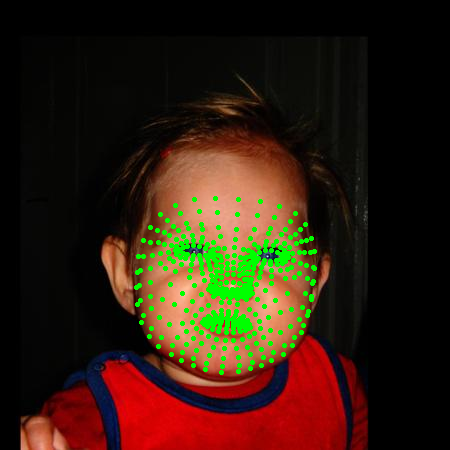

In [ ]:
# choosing random image from the testing data
random_path = random.choice(get_list_from_filenames("/content/image/*.jpg"))
faceModule = mediapipe.solutions.face_mesh
with faceModule.FaceMesh(static_image_mode=True) as face:
  # reading the image
  frame = cv2.imread("/content/image/"+ random_path + '.jpg')
  # processing the image to detect the face and then generating the land marks (468 for each x,y,z).
  results = face.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
  if results.multi_face_landmarks != None:
    for face in results.multi_face_landmarks:
        # 
        for j,landmark in enumerate(face.landmark):
            x = landmark.x
            y = landmark.y
            shape = frame.shape 
            relative_x = int(x * shape[1])
            relative_y = int(y * shape[0])
            cv2.circle(frame, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
            #cv2.putText(frame, str(j), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,255), 2)
    cv2_imshow(frame)





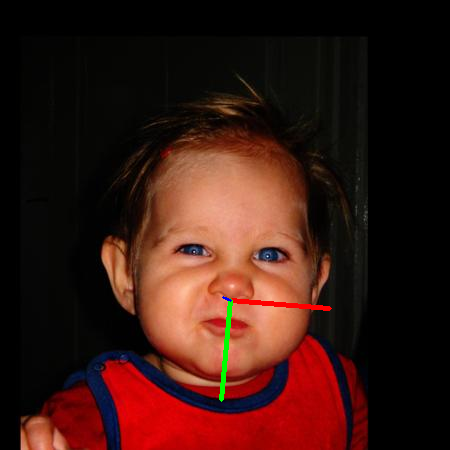

In [ ]:
frame = cv2.imread('/content/image/' + random_path + '.jpg')
# reading the true labels and drawing the axis on the image
# mat = sio.loadmat('/content/image/' +random_path + '.mat')
pose = read_pose('/content/image/' +random_path + '.mat')
pitch = pose[0]
yaw = pose[1]
roll = pose[2]
cv2_imshow(draw_axis(frame,pitch,yaw,roll,230,300))

###get x,y for center

In [ ]:
def print_point(p):
      faceModule = mediapipe.solutions.face_mesh
      # loading image and its correspinding mat file
      with faceModule.FaceMesh(static_image_mode=True) as faces:
          # loading the image
          image = cv2.imread(p)
          diementions= image.shape
          # processing the face to extract the landmark points (468 point) for each x,y,z
          results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
          if results.multi_face_landmarks != None: 
            # looping over the faces in the image
            for face in results.multi_face_landmarks:
                print((face.landmark[0]).x)
                for idx, landmark in enumerate(face.landmark):
                   if idx == 1:
                      nose_2d = (landmark.x * diementions[1], landmark.y * diementions[0])
                x=int(nose_2d[0])
                y=int(nose_2d[1])
            return x,y

##pred_pose used to extract featues from image and predict pitch yaw and roll

In [ ]:

def pred_pose(path_):

  x2,y2=get_landmarkes(path_)
  x2=np.array(x2)
  y2=np.array(y2)

  try:
    relative_x ,relative_y = print_point(path_)
  except:
    print("An exception occurred")
  # print(relative_x)
  # print(relative_y)
  landmarks=np.concatenate((x2, y2), axis=None)
  featuress=landmarks.reshape(1, -1)
  # print(featuress)
  landmarks_x = ['x' + str(i) for i in range(468)]
  landmarks_y = ['y' + str(i) for i in range(468)]
  f = landmarks_x + landmarks_y
  df = pd.DataFrame(featuress, columns = f)
  p=pitch_model.predict(df)
  ya=yaw_model.predict(df)
  r=roll_model.predict(df)
 
  # print(p)
  # print(ya)
  # print(r)
  i = cv2.imread(path_)
  framet = cv2.imread(path_)
  framet = cv2.cvtColor(framet,cv2.COLOR_BGR2RGB)
  framet = cv2.cvtColor(framet,cv2.COLOR_BGR2RGB)
  # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (0,255,0), 1)
  cv2_imshow(draw_axis(framet,p,-ya,r,relative_x,relative_y))


0.5102384090423584


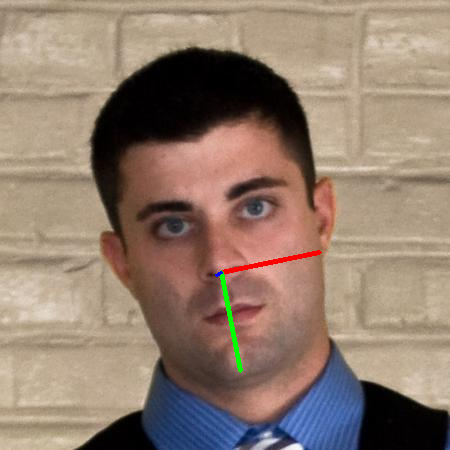

In [ ]:
pred_pose("/content/drive/MyDrive/imageML/image00013.jpg")

##image capture 

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

##Load  pkl Modeles

In [ ]:
import pickle
model1 = pickle.load(open('/content/drive/MyDrive/MLProject/Models/pitch_model.pkl', 'rb'))
model2 = pickle.load(open('/content/drive/MyDrive/MLProject/Models/yaw_model.pkl', 'rb'))
model3 = pickle.load(open('/content/drive/MyDrive/MLProject/Models/roll_model.pkl', 'rb'))

0.5374530553817749


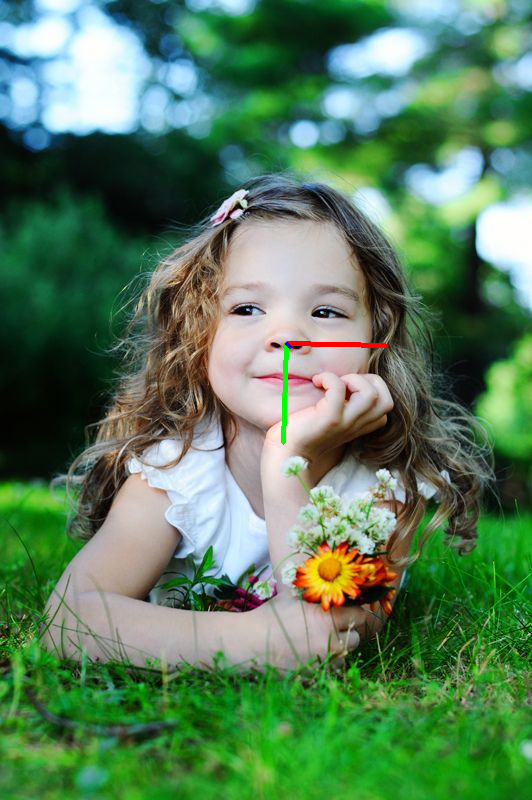

In [ ]:
pred_pose("/content/drive/MyDrive/imageML/1bca6c88b38000334f5c709a0e122280.jpg")

##Video Capture

In [ ]:
# Adapted from: https://stackoverflow.com/a/62804023/4879610
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def record_video(filename):
  js = Javascript("""
    async function recordVideo() {
      // mashes together the advanced_outputs.ipynb function provided by Colab, 
      // a bunch of stuff from Stack overflow, and some sample code from:
      // https://developer.mozilla.org/en-US/docs/Web/API/MediaStream_Recording_API

      // Optional frames per second argument.
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");
      capture.textContent = "Start Recording";
      capture.style.background = "green";
      capture.style.color = "white";

      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);

      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';

      const stream = await navigator.mediaDevices.getUserMedia({audio:true, video: true});
      // create a media recorder instance, which is an object
      // that will let you record what you stream.
      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);
      // Video is a media element.  This line here sets the object which serves
      // as the source of the media associated with the HTMLMediaElement
      // Here, we'll set it equal to the stream.
      video.srcObject = stream;

      // from https://stackoverflow.com/questions/62529304/is-there-any-way-to-capture-live-video-using-webcam-in-google-colab#comment114644726_62804023
      video.muted = true;

      // We're inside an async function, so this await will fire off the playing
      // of a video. It returns a Promise which is resolved when playback has 
      // been successfully started. Since this is async, the function will be 
      // paused until this has started playing. 
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      // and now, just wait for the capture button to get clicked in order to
      // start recording
      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);
      // use a promise to tell it to stop recording
      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();

      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();
      
      // stop the stream and remove the video element
      stream.getVideoTracks()[0].stop();
      div.remove();

      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
      return btoa(binaryString);

    }
    """)
  try:
    display(js)
    data = eval_js('recordVideo({})')
    binary = b64decode(data)
    with open(filename, "wb") as video_file:
      video_file.write(binary)
    print(
        f"Finished recording video. Saved binary under filename in current working directory: {filename}"
    )
  except Exception as err:
      # In case any exceptions arise
      print(str(err))


In [ ]:
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 600):
  # show saved video in colab.
  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

In [ ]:
video_path = "/content/drive/MyDrive/MLProject/Inputvideo/test.mp4"
video_path = "test.mp4"
record_video(video_path)

<IPython.core.display.Javascript object>

Finished recording video. Saved binary under filename in current working directory: test.mp4


In [ ]:
# show_video(video_path)

In [ ]:
!pip install cmake
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 27 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=5f911e7eb0e05edbf28317fe775c3e6e79fc2cad9c61422ef8d617bc1c94bb51
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
%pylab inline 
import face_recognition
import cv2
import matplotlib.patches as patches
from IPython.display import clear_output
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

Populating the interactive namespace from numpy and matplotlib


##save images after draw P,Y,R

In [ ]:

def save_pose(path_,outputfile='out0.jpg'):

  x2,y2=get_landmarkes(path_)
  x2=np.array(x2)
  y2=np.array(y2)
  relative_x ,relative_y = print_point(path_)
  # print(relative_x)
  # print(relative_y)
  landmarks=np.concatenate((x2, y2), axis=None)
  featuress=landmarks.reshape(1, -1)
  # print(featuress)
  landmarks_x = ['x' + str(i) for i in range(468)]
  landmarks_y = ['y' + str(i) for i in range(468)]
  f = landmarks_x + landmarks_y
  df = pd.DataFrame(featuress, columns = f)
  p=pitch_model.predict(df)
  ya=yaw_model.predict(df)
  r=roll_model.predict(df)
 
  # print(p)
  # print(ya)
  # print(r)
  i = cv2.imread(path_)
  framet = cv2.imread(path_)
  framet = cv2.cvtColor(framet,cv2.COLOR_BGR2RGB)
  framet = cv2.cvtColor(framet,cv2.COLOR_BGR2RGB)
  cv2.imwrite(outputfile, draw_axis(framet,p,-ya,r,relative_x,relative_y)) 
  # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (0,255,0), 1)
  # cv2_imshow(draw_axis(framet,p,-ya,r,relative_x,relative_y))


##Extract frames from video::

In [48]:
vidcap = cv2.VideoCapture('/content/drive/MyDrive/MLProject/Inputvideo/vedio1.mp4')
success,image = vidcap.read()
count = 0

while success:
  cv2.imwrite("/content/drive/MyDrive/MLProject/frames2/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  iname='/content/drive/MyDrive/MLProject/frames2/frame'+str(count)+'.jpg'
  out='/content/drive/MyDrive/MLProject/outputframes2/frame'+str(count)+'.jpg'
  # show_land(iname,out)
  save_pose(iname,out)
  # print(iname)

  # print('Read a new frame: ', success)
  count += 1

0.5640453100204468
0.5709530711174011
0.571615993976593
0.5719851851463318
0.5716955065727234
0.571847140789032
0.5721511244773865
0.5718317627906799
0.5716605186462402
0.5716375708580017
0.5717292428016663
0.571617841720581
0.571121871471405
0.5711477994918823
0.5734471678733826
0.5742573738098145
0.5748557448387146
0.5749896168708801
0.5765305161476135
0.5765829086303711
0.576895534992218
0.5872942805290222
0.5874239802360535
0.5881576538085938
0.5883795619010925
0.585669994354248
0.5939522385597229
0.5938805937767029
0.597836971282959
0.5978593826293945
0.5977909564971924
0.5991343259811401
0.5967008471488953
0.5986404418945312
0.5990122556686401
0.5991891622543335
0.5987234115600586
0.5990772843360901
0.5991632342338562
0.5960618257522583
0.594211995601654
0.5939960479736328
0.5905624628067017
0.590482771396637
0.5879343748092651
0.587920606136322
0.5882676839828491
0.5882953405380249
0.5881708860397339
0.5882338881492615
0.5811135172843933
0.581100344657898
0.6003341674804688
0.60

In [ ]:
!pip install natsort

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##sort frames

In [49]:
from natsort import natsorted


In [44]:
from moviepy.editor import *

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2818048/45929032 bytes (6.1%)5537792/45929032 bytes (12.1%)8093696/45929032 bytes (17.6%)10878976/45929032 bytes (23.7%)12214272/45929032 bytes (26.6%)14778368/45929032 bytes (32.2%)18366464/45929032 bytes (40.0%)21618688/45929032 bytes (47.1%)24723456/45929032 bytes (53.8%)28057600/45929032 bytes (61.1%)31522816/45929032 bytes (68.6%)34766848/45929032 bytes (75.7%)

##Make video from frames

In [51]:

import os
import moviepy.video.io.ImageSequenceClip
image_folder='/content/drive/MyDrive/MLProject/outputframes2/'

fps=20
# /content/outimage0.jpg


image_files = [os.path.join(image_folder,img)
               for img in os.listdir(image_folder)
               
               if img.endswith(".jpg")]
  
image_files= natsorted(image_files)       
# files = ['1.png', '2.png', '3.png', '4.png']
# frames = [ImageClip(f, duration = 4) for f in image_files] 
# print(image_files)     
# clip = concatenate_videoclips(frames, method = "chain")
# clip.write_videofile("/content/drive/MyDrive/MLProject/outputvideo/my_video.mp4", fps = 24)  
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile('/content/drive/MyDrive/MLProject/outputvideo/my_video.mp4')

[MoviePy] >>>> Building video /content/drive/MyDrive/MLProject/outputvideo/my_video.mp4
[MoviePy] Writing video /content/drive/MyDrive/MLProject/outputvideo/my_video.mp4


100%|██████████| 506/506 [00:34<00:00, 14.79it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/MyDrive/MLProject/outputvideo/my_video.mp4 

